In [1]:
# import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis, get_time_plate_info_long_from_analysis
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate,plot_single_plate_biovolume
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
%store -r path_figure
%matplotlib widget
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy
import statsmodels.api as sm
import hashlib
from matplotlib.patches import Ellipse
import logging
plt.style.use('presentation.mplstyle')
logging.getLogger().setLevel(logging.WARNING)

all_analysis_folders = get_analysis_folders()
#for P
plates = [
"416_20230705",
"427_20230707",
"420_20230705",
"431_20230627",
"474_20230807",
"460_20230807",
"464_20230807",
"440_20230723",
"436_20230717",
"443_20230720",
"439_20230804",
"470_20230709",
'478_20230814', '468_20230809', '447_20230821', '487_20230922',
       '492_20230901', '471_20230821', '486_20231009',
       '494_20230908', '482_20230908', '495_20231013', '463_20231013',
       '491_20231013', '481_20231005', '483_20231005', '490_20231003',
       '485_20230929',
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,False)
# folders,time_plate_info = get_time_plate_info_long_from_analysis(analysis_folders,False)
time_plate_info['unique_id'] = time_plate_info['unique_id'].replace(47020230709,47020230802)
time_plate_info=time_plate_info[time_plate_info['Plate']!=431]
# time_plate_info['time_since_begin_hour'] = time_plate_info['time_since_begin_h'].dt.total_seconds() / 3600.0
time_plate_info['time_since_begin_hour'] = time_plate_info['time_since_begin_h']

In [256]:
df_filtered

SA_region_0  SA_region_1  SA_region_2  SA_region_3  SA_region_4  \
680          NaN          NaN          NaN          NaN          NaN   
681          NaN          NaN          NaN          NaN          NaN   
682          NaN          NaN          NaN          NaN          NaN   
683          NaN          NaN          NaN          NaN          NaN   
684          NaN          NaN          NaN          NaN          NaN   
685          NaN          NaN          NaN          NaN          NaN   
686          NaN          NaN          NaN          NaN          NaN   
687          NaN          NaN          NaN          NaN          NaN   
688          NaN          NaN          NaN          NaN          NaN   
689          NaN          NaN          NaN          NaN          NaN   
690          NaN          NaN          NaN          NaN          NaN   
691          NaN          NaN          NaN          NaN          NaN   
692          NaN          NaN          NaN          NaN          NaN   
693          NaN          NaN          NaN          NaN          NaN   
694          NaN          NaN          NaN          NaN          NaN   
816          NaN          NaN          NaN          NaN          NaN   

     SA_region_5  SA_region_6  SA_region_7  SA_region_8  SA_region_9  ...  \
680          NaN          NaN          NaN          NaN          NaN  ...   
681          NaN          NaN          NaN          NaN          NaN  ...   
682          NaN          NaN          NaN          NaN          NaN  ...   
683          NaN          NaN          NaN          NaN          NaN  ...   
684          NaN          NaN          NaN          NaN          NaN  ...   
685          NaN          NaN          NaN          NaN          NaN  ...   
686          NaN          NaN          NaN          NaN          NaN  ...   
687          NaN          NaN          NaN          NaN          NaN  ...   
688          NaN          NaN          NaN          NaN          NaN  ...   
689          NaN          NaN          NaN          NaN          NaN  ...   
690          NaN          NaN          NaN          NaN          NaN  ...   
691          NaN          NaN          NaN          NaN          NaN  ...   
692          NaN          NaN          NaN          NaN          NaN  ...   
693          NaN          NaN          NaN          NaN          NaN  ...   
694          NaN          NaN          NaN          NaN          NaN  ...   
816          NaN          NaN          NaN          NaN          NaN  ...   

     integrated_L_8  integrated_L_9  integrated_L_10  integrated_L_11  \
680             NaN             NaN              NaN              NaN   
681    4.138012e+05    2.624235e+05         0.000000     0.000000e+00   
682    9.465414e+05    5.761238e+05         0.000000     0.000000e+00   
683    2.593893e+06    1.493055e+06         0.000000     0.000000e+00   
684    3.871323e+06    2.152825e+06         0.000000     0.000000e+00   
685    5.635393e+06    3.050495e+06         0.000000     0.000000e+00   
686    7.804231e+06    4.135224e+06         0.000000     0.000000e+00   
687    1.076426e+07    5.543912e+06         0.000000     0.000000e+00   
688    1.423353e+07    7.170220e+06         0.000000     0.000000e+00   
689    1.831818e+07    9.115857e+06         0.000000     0.000000e+00   
690    2.285690e+07    1.137528e+07         0.000000     0.000000e+00   
691    2.802016e+07    1.404227e+07         0.000000     0.000000e+00   
692    3.358639e+07    1.696527e+07         0.000000     0.000000e+00   
693    3.963418e+07    2.021094e+07         0.000000     0.000000e+00   
694    4.615251e+07    2.373311e+07         0.000000     0.000000e+00   
816    3.223649e+05    9.671115e+04    225364.181781     1.847946e+06   

     integrated_L_12  integrated_L_13  integrated_L_14  integrated_L_15  \
680              NaN              NaN              NaN              NaN   
681         0.000000      2697.244724         0.000000         0.000000   
682

In [13]:
def calculate_integral(df, column, new_column):
    # Calculate the time difference within each group
    df['time_since_begin_hour'] = time_plate_info['time_since_begin_h']
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_hour'].transform(lambda x: x.diff())

    # Calculate the average length density within each group
    df['avg_length_density'] = df.groupby('unique_id')[column].transform(lambda x: x.rolling(window=2).mean())

    # Calculate the "area" (using Trapezoidal rule) for each pair of rows within each group
    df['area'] = df['time_diff'] * df['avg_length_density']

    # Perform the integration (cumulative sum of "area") within each group
    df[new_column] = df.groupby('unique_id')['area'].transform(lambda x: x.cumsum())

    # Drop the helper columns if needed
    df.drop(['time_diff', 'avg_length_density', 'area'], axis=1, inplace=True)

In [6]:
list(time_plate_info.columns)

['num_trunks',
 'area',
 'area_sep_comp',
 'num_tips',
 'num_nodes',
 'area_study',
 'num_tips_study',
 'num_nodes_study',
 'num_edges_study',
 'tot_length',
 'tot_length_study',
 'out_study',
 'mean_straightness',
 'spore_volume',
 'num_spores',
 'tot_biovolume_study',
 'tot_biovolume',
 'tot_surface_area_study',
 'date',
 'Plate',
 'path_exp',
 'folder_analysis',
 'ring_biovolume_density_incr-100_index-0',
 'ring_biovolume_density_incr-100_index-1',
 'ring_biovolume_density_incr-100_index-2',
 'ring_biovolume_density_incr-100_index-3',
 'ring_biovolume_density_incr-100_index-4',
 'ring_biovolume_density_incr-100_index-5',
 'ring_biovolume_density_incr-100_index-6',
 'ring_biovolume_density_incr-100_index-7',
 'ring_biovolume_density_incr-100_index-8',
 'ring_biovolume_density_incr-100_index-9',
 'ring_biovolume_density_incr-100_index-10',
 'ring_biovolume_density_incr-100_index-11',
 'ring_biovolume_density_incr-100_index-12',
 'ring_biovolume_density_incr-100_index-13',
 'ring_biovo

In [14]:

calculate_integral(time_plate_info,f'tot_surface_area_study',f'integrated_SA')
# calculate_integral(time_plate_info,f'length_density_region_{i}',f'integrated_L_{i}')


In [10]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from helper import *
from amftrack.notebooks.P_experiment.helper import get_polygons
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')

%matplotlib widget
C_max2 = 1.53

def fit_function(x, C_max):
    return 1+C_max * 1/x**(3/2)
# Read the Excel file
path = r'C:\Users\coren\AMOLF-SHIMIZU Dropbox\Corentin Bisot\PC\Documents\PhD\Pexperiment'
path_excel = os.path.join(path,'summary.xlsx')
df = pd.read_excel(path_excel)
df['date_from_unique_id'] = pd.to_datetime(df['unique_id'].str.split('_').str[1], format='%Y%m%d')
    
# Convert 'day' column to datetime
df['day_sample'] = pd.to_datetime(df['day_sample'], format='%Y%m%d')  # Update the format as necessary
df['day_start'] = pd.to_datetime(df['start'], format='%Y%m%d')  # Update the format as necessary

df['time_elapsed'] = df['day_sample'] - df['day_start']
df['time_elapsed_day'] = df['time_elapsed'].dt.days
df['time_since_crossing'] = df['day_sample'] - df['date_from_unique_id']
df['t2 (day)'] = df['time_since_crossing'].dt.days
df['t1 (day)'] = df['time_elapsed_day']-df['t2 (day)']
df['treatment'] = df['treatment'].fillna('none')
df['wet_weight_measured'] = df['wet weight']

df['wet weight'] = df['wet weight']-df['lost weight']
df['totP (ug)'] = df['totP (ug)'] * fit_function(df['totP (ug)'], C_max2)

grouped = df.groupby(['plate', 'type', "time_elapsed_day", "t1 (day)", "treatment", 't2 (day)', "arrangement","day_start"]).agg({
    'totP (ug)': 'sum',
    'wet weight': ['sum', 'median'],
    "wet_weight_measured":"sum",
    'dry weight': 'sum'
}).reset_index()

# Rename columns
grouped.columns = ['_'.join(col).strip() if col[0] == 'wet weight' else col[0] for col in grouped.columns]
grouped = grouped.rename(columns={
    'wet weight_sum': 'tot_wet_weight',
    'wet weight_median': 'wet_weight_median'
})
grouped['C_P'] = grouped['totP (ug)'] / grouped['tot_wet_weight']
grouped['P_content'] = grouped['totP (ug)'] / grouped['dry weight']/1e6

df['C_P'] = df['totP (ug)'] / df['wet weight']
df['P_content'] = df['totP (ug)'] / df['dry weight']/1e6
df = df[df['type'] == 'agar']
# df = df[df['type'] != 'sub']
df['Sample_name'] = df['Sample_name'].str.replace('bottom','0')
df['Sample_name'] = df['Sample_name'].str.replace('up','1')
df['Sample_name'] = df['Sample_name'].str.replace('top','1')
df['Sample_name'] = df['Sample_name'].str.replace('agar','0')



df['pos'] = df['Sample_name'].str.split('-').str.get(1).astype(int)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
coarse_to_basic_mapping = {
    1: [1, 2],
    2: [3, 8],
    3: [4, 5],
    4: [6, 7],
    5: [9, 10],
    6: [11, 12],
    7: [13],
    8: [14, 15],
    9: [16, 17, 18]
}

# Mapping for "simple" to "basic"
simple_to_basic_mapping = {
    0: list(range(1, 11)),
    1: list(range(11, 19))
}
sub_to_basic_mapping = {
    0: list(range(1, 19)),
}

In [32]:
time_plate_info.sort_values(['unique_id', 'time_since_begin_h'], inplace=True)

# Group by unique_id and take the last entry for each group
last_values = time_plate_info.groupby('unique_id').last().reset_index()

# Create a function to map 'pos' to the corresponding integrated_Ldens_i value
def get_integrated_density(row):
    unique_id = row['unique_id']
    pos = row['pos']
    arrangement = row['arrangement']
    if arrangement == 'basic':
        col_names = [f'integrated_SA_{pos-1}']
    if arrangement == 'simple':
        col_names = [f'integrated_SA_{basic_pos-1}' for basic_pos in simple_to_basic_mapping[pos]]
    if arrangement == 'coarse':
        col_names = [f'integrated_SA_{basic_pos-1}' for basic_pos in coarse_to_basic_mapping[pos]] 
    if arrangement == 'sub':
        col_names = [f'integrated_SA_{basic_pos-1}' for basic_pos in sub_to_basic_mapping[pos]] 
    if not unique_id is np.nan:
        last_value_row = last_values[last_values['unique_id'] == int(unique_id)]
        return np.sum(last_value_row[col_names].values) if not last_value_row.empty else None
    else:
        return(None)

# Apply the function to fill the 'integrated_density' column
df['integrated_SA'] = df.apply(get_integrated_density, axis=1)

In [33]:
df['integrated_SA_C']=df['integrated_SA']/df['wet weight']
grouped = dfgrouped = df.groupby(['plate', 'type',"time_elapsed_day","t1 (day)","treatment",'t2 (day)']).agg({'totP (ug)': 'sum', 'wet weight': 'sum','dry weight' : "sum",'integrated_SA':"sum"}).reset_index()
grouped['C_P'] = grouped['totP (ug)'] / grouped['wet weight']
grouped['P_content'] = grouped['totP (ug)'] / grouped['dry weight']/1e6
grouped['integrated_SA_C']=grouped['integrated_SA']/grouped['wet weight']


In [36]:
df['unique_id'].unique()

array(['427_20230707', '416_20230705', '420_20230705', '474_20230807',
       '460_20230807', '464_20230807', '440_20230723', '436_20230717',
       '443_20230720', '439_20230804', '470_20230802', '478_20230814',
       '468_20230809', '447_20230821', '487_20230922', '492_20230901',
       '471_20230821', '486_20231009', '494_20230908', '482_20230908',
       '495_20231013', '463_20231013', '491_20231013', '481_20231005',
       '483_20231005', '490_20231003', '485_20230929'], dtype=object)

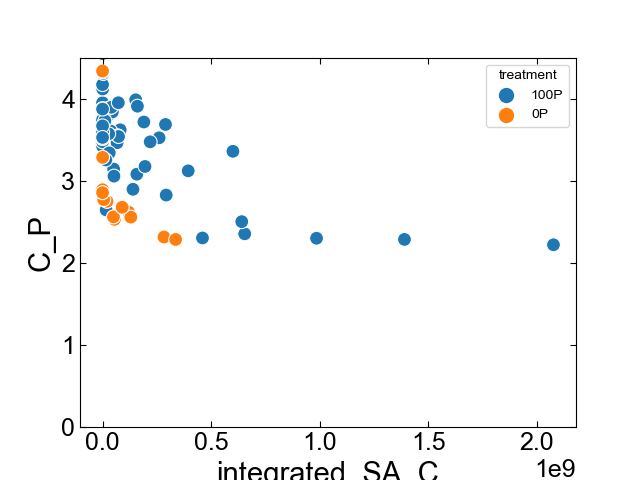

In [35]:
fig,ax = plt.subplots()
df = df[df['plate']!=431]
sns.scatterplot(df,x = 'integrated_SA_C',y = 'C_P',ax = ax,hue ="treatment")
# ax.set_xscale('log')
# ax.hlines(mean0P,0,2e9, color = "grey",label = "test samples (0P)")
ax.set_ylim(0,4.5)
plt.show()

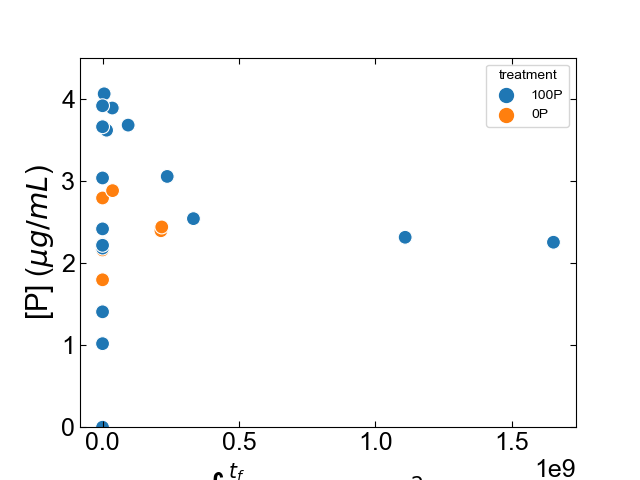

In [39]:
fig,ax = plt.subplots()
grouped = grouped[grouped['plate']!=431]
# sns.scatterplot(df,x = 'integrated_SA_C',y = 'C_P',ax = ax,hue ="treatment",s = 6)
sns.scatterplot(grouped,x = 'integrated_SA_C',y = 'C_P',ax = ax,hue ="treatment")
# ax.set_xscale('log')
ax.set_ylim(0,4.5)
plt.ylabel('[P] ($\mu g/mL$)')
plt.xlabel('$\int_0^{t_f} SA(t)dt$ ($\mu m^2h$)')
# plt.savefig(os.path.join('figures', 'P_SA.pdf'), transparent=True, bbox_inches='tight')

plt.show()

In [41]:
# import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd

# Define the Michaelis-Menten differential equation
def mm_eq(S, t, A_t, Vmax, Km):
    return -Vmax * (A_t * S / (Km + S))

# Objective function to minimize
def objective(params, all_times, all_areas, all_final_concentrations, initial_concentration):
    Vmax, Km = params
    total_error = 0

    # Loop over each unique time series
    for times, areas, final_S in zip(all_times, all_areas, all_final_concentrations):
        S = initial_concentration
        # Integrate for each time step within this series
        last_time = 0  # Keep track of the last time point

        # Integrate for each time step within this series
        for t, a in zip(times, areas):
            S = odeint(mm_eq, S, [last_time, t], args=(a, Vmax, Km))[-1]
            last_time = t  # Update the last time point for the next iteration
        # Sum of squared error for this series
        if not np.isnan(S[0]):
            total_error += (S[0] - final_S)**2
        # if np.isnan(total_error):
        #     print(total_error,times,areas)
        #     break
    print(total_error)
    return total_error


***region***

In [52]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Sorting the DataFrame just in case
time_plate_info = time_plate_info.sort_values(['unique_id', 'time_since_begin_hour'])

all_times = []
all_areas = []
all_final_concentrations=[]
unique_ids = time_plate_info['unique_id'].unique()

# Loop over each unique_id
for unique_id in unique_ids:
    select_df = df[df['unique_id'].astype(np.int64)==unique_id]
    subset_df = time_plate_info[time_plate_info['unique_id'] == unique_id]
    time_series = subset_df['time_since_begin_hour'].values
    for index,row in select_df.iterrows():
        arrangement = row['arrangement']
        index = row['pos']
        vol = row['wet weight']
        P_C = row['C_P']
        treatment = row['treatment']
        indexes = get_regions(arrangement, index)
        area_series = [subset_df[f'SA_region_{i}'].values for i in indexes]
        
        # Append the time and area series to the lists
        if P_C<5 and treatment!='0P':
            all_times.append(time_series)
            all_areas.append(np.sum(area_series,axis=0)/vol)
            all_final_concentrations.append(max(P_C,0))
# Now, all_times and all_areas contain the time and area series for each unique_id and each region
initial_concentration = 3.9

***whole plate***

In [69]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Sorting the DataFrame just in case
time_plate_info = time_plate_info.sort_values(['unique_id', 'time_since_begin_hour'])

all_times = []
all_areas = []
all_final_concentrations=[]
unique_ids = time_plate_info['unique_id'].unique()
shift= 2.4
# Loop over each unique_id
for unique_id in unique_ids:
    select_df = df[df['unique_id'].astype(np.int64)==unique_id]
    subset_df = time_plate_info[time_plate_info['unique_id'] == unique_id]
    time_series = subset_df['time_since_begin_hour'].values
    area_series = [subset_df[f'SA_region_{i}'].values for i in range(18)]        # Append the time and area series to the lists
    vol = np.sum(select_df['wet weight'])
    P_C = np.sum(select_df['totP (ug)'])/vol
    treatment = select_df['treatment'].iloc[0]
    if P_C<5 and treatment!='0P':
        all_times.append(time_series)
        all_areas.append(np.sum(area_series,axis=0)/vol)
        all_final_concentrations.append(max(P_C-shift,0))
# Now, all_times and all_areas contain the time and area series for each unique_id and each region
initial_concentration = 3.9-shift

In [74]:
initial_guesses = [1e-8,1]
initial_concentration = 3.9-shift
deltas = np.array([1e-7, 10])
init_params = initial_guesses
simplex = [init_params]
for i in range(len(init_params)):
    new_point = np.copy(init_params)
    new_point[i] += deltas[i]
    simplex.append(new_point)

# Convert to numpy array for use in scipy.minimize
initial_simplex = np.array(simplex)
result = minimize(objective, initial_guesses, args=(all_times, all_areas, all_final_concentrations, initial_concentration), method='Nelder-Mead', options={'initial_simplex': initial_simplex,"xatol" : 0.1})
Vmax, Km = result.x

# Print results
print(f"Best-fitting parameters: Vmax = {Vmax}, Km = {Km}")

0.4783039054787797
5.042914016395661
1.9389786293628029
14561.14032850727
2.189707076157437
2129.600554219089
0.7253870619873936
119.82888273582077
0.608455022167343
150.61401368507902
0.42523987037375827
8.142672956209786
0.3835440927817493
0.35602094752233676
0.36356319397723746
0.47625423108963033
0.35527657676595703
0.372568448183068
0.36117923587337425
0.3546675112122182
0.3835440927817493
0.34245754612806983
0.44361001142848316
0.3645173893294131
0.3486522889385512
0.4116813151429117
0.3472794636367409
0.3362353774958668
0.32719238024380704
0.3313475585720897
1.9170607911824549
0.3303471342512831
0.3443461714144167
0.3127351273886703
0.3114656113360439
0.34075459187088125
0.27047785849137485
1.7690358826967583
0.28514713988388707
1.5610414153758048
0.28986140675539895
0.3533771565093581
0.2734635181263709
0.31269479804186695
0.2601893863632328
0.25488622930681526
0.3971151841659852
0.24276397544279557
0.2888061007494245
0.2855259270274461
0.24493089229189124
0.3106201909095279
0.

In [75]:
print(f"Best-fitting parameters: Vmax = {Vmax}, Km = {Km}")

Best-fitting parameters: Vmax = 3.366330229537193e-09, Km = -0.0637994936018913


In [61]:
print(f"Best-fitting parameters: Vmax = {Vmax}, Km = {Km}")

Best-fitting parameters: Vmax = 30.08785106057899, Km = 65117086211.424164


0.2121484531532467
0.2121484531532467
2023-11-03 18:16:44,719-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


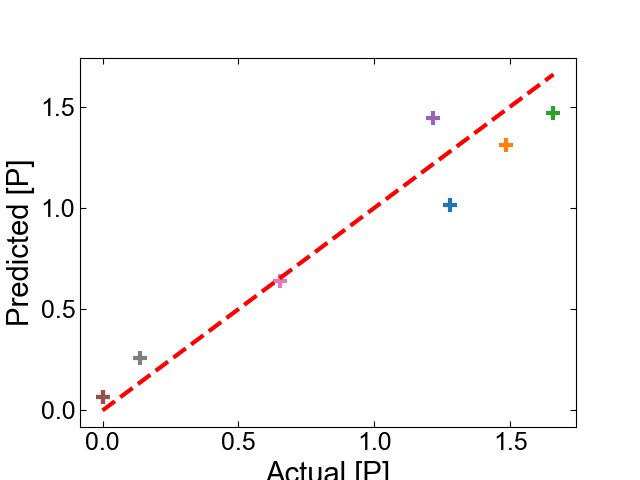

In [76]:
predicted_final_concentrations = []
actual_final_concentrations = all_final_concentrations  # Assuming this is already available
Vmax, Km = result.x
plt.figure()

# Calculate predicted final concentrations
for times, areas, final_C in zip(all_times, all_areas,all_final_concentrations):
    predicted_S = get_predicted_concentration(times, areas, Vmax, Km, initial_concentration)
    predicted_final_concentrations.append(predicted_S[-1])
    plt.scatter(final_C,predicted_S[-1],marker = "+")

# Create the plot
# plt.scatter(actual_final_concentrations, predicted_final_concentrations, c='blue')
plt.xlabel('Actual [P]')
plt.ylabel('Predicted [P]')

# Plot a 45-degree line for reference
min_val = min(min(actual_final_concentrations), min(predicted_final_concentrations))
max_val = max(max(actual_final_concentrations), max(predicted_final_concentrations))
print(objective([Vmax, Km],all_times,all_areas,all_final_concentrations,initial_concentration))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.savefig(os.path.join('figures', 'modelfit.pdf'), transparent=True, bbox_inches='tight')


2023-11-03 18:16:47,688-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


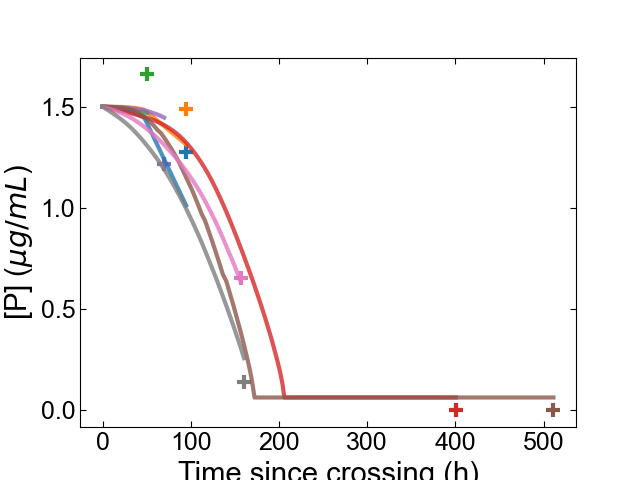

In [77]:
def get_predicted_concentration(times, areas, Vmax, Km, initial_concentration):
    S = initial_concentration
    last_time = 0  # Initialize the last time point
    S_values = []  # To store concentration at each time point
    
    # Integrate for each time step
    for t, a in zip(times, areas):
        S = odeint(mm_eq, S, [last_time, t], args=(a, Vmax, Km))[-1]
        S_values.append(S[0])  # Storing concentration at each time step
        last_time = t  # Update the last time point for next iteration
    
    return np.array(S_values)
plt.figure()

# Assuming you have a single time series for demonstration (replace with your actual time series)
i=0
for times, areas in zip(all_times, all_areas):
    predicted_S_values = get_predicted_concentration(times, areas, Vmax, Km, initial_concentration)
    concentration = all_final_concentrations[i]
    plt.plot(times, predicted_S_values, alpha = 0.8)
    plt.scatter(times[-1],actual_final_concentrations[i],marker = "+")
    i+=1
    
# Plotting predicted trajectory

plt.xlabel('Time since crossing (h)')
plt.ylabel('[P] ($\mu g/mL$)')
# plt.legend()
plt.savefig(os.path.join('figures', 'Time_concentration.pdf'), transparent=True, bbox_inches='tight')


C:\Users\coren\AppData\Local\Temp\ipykernel_21176\3615550665.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


2023-11-03 18:17:46,479-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


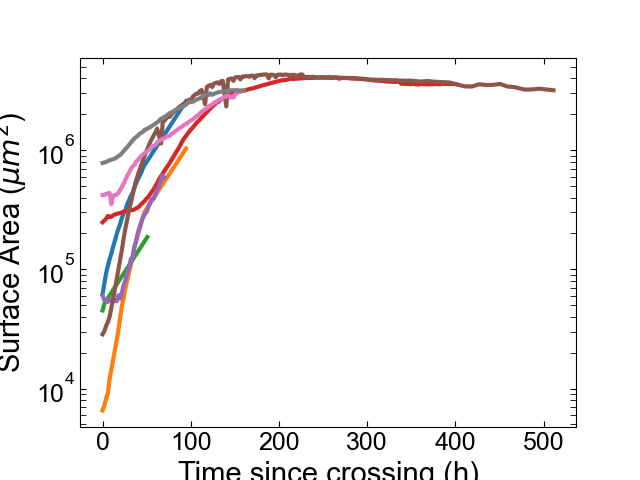

In [78]:
# Assuming you have a single time series for demonstration (replace with your actual time series)
plt.figure()

i=0
for times, areas in zip(all_times, all_areas):
    plt.plot(times, areas, label=unique_ids[i])
    # plt.scatter(times[-1],actual_final_concentrations[i])
    i+=1
    
# Plotting predicted trajectory

plt.xlabel('Time since crossing (h)')
plt.ylabel('Surface Area ($\mu m^2$)')
# plt.legend()
plt.yscale('log')
plt.savefig(os.path.join('figures', 'time_SA.pdf'), transparent=True, bbox_inches='tight')


2023-11-03 18:17:51,146-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


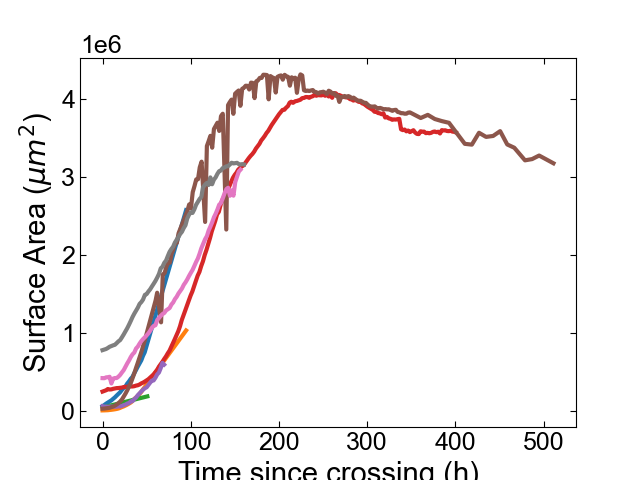

In [79]:
# Assuming you have a single time series for demonstration (replace with your actual time series)
plt.figure()

i=0
for times, areas in zip(all_times, all_areas):
    plt.plot(times, areas, label=unique_ids[i])
    # plt.scatter(times[-1],actual_final_concentrations[i])
    i+=1
    
# Plotting predicted trajectory

plt.xlabel('Time since crossing (h)')
plt.ylabel('Surface Area ($\mu m^2$)')
# plt.legend()
# plt.yscale('log')
plt.savefig(os.path.join('figures', 'time_SA.pdf'), transparent=True, bbox_inches='tight')


In [143]:
def get_regions(arrangement, index):
    coarse_to_basic_mapping = {
    1: [1, 2],
    2: [3, 8],
    3: [4, 5],
    4: [6, 7],
    5: [9, 10],
    6: [11, 12],
    7: [13],
    8: [14, 15],
    9: [16, 17, 18]
}

    # Mapping for "simple" to "basic"
    simple_to_basic_mapping = {
        0: list(range(1, 11)),
        1: list(range(11, 19))
    }
    if arrangement == 'basic':
        indexes = [index-1]
    if arrangement == 'simple':
        indexes = [basic_pos-1 for basic_pos in simple_to_basic_mapping[index]]
    if arrangement == 'coarse':
        indexes = [basic_pos-1 for basic_pos in coarse_to_basic_mapping[index]] 
    return(indexes)

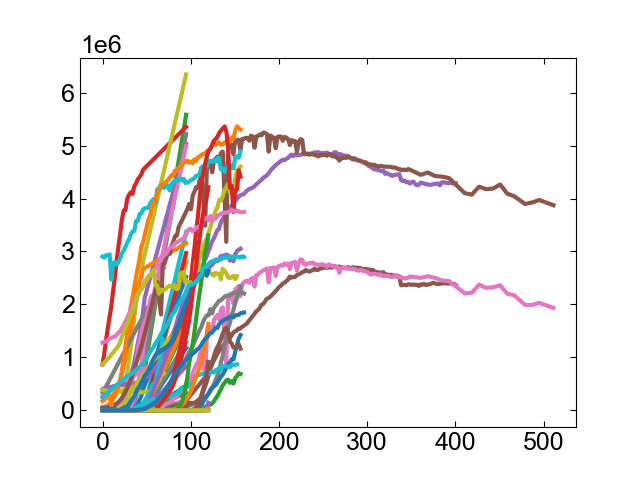

In [153]:
fig,ax = plt.subplots()
for index,time in enumerate(all_times):
    ax.plot(time,all_areas[index])
# all_areas

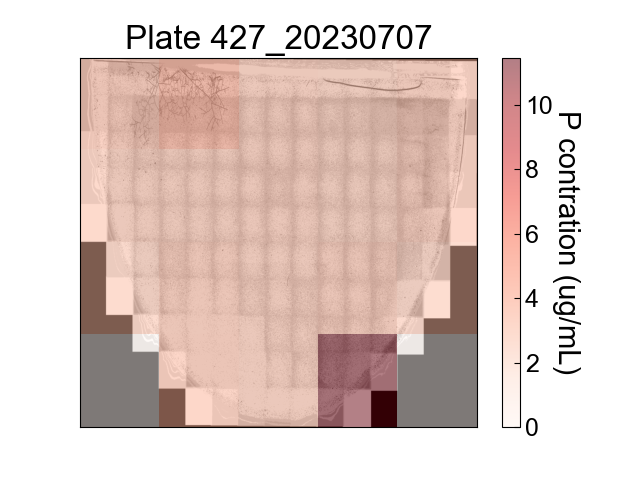

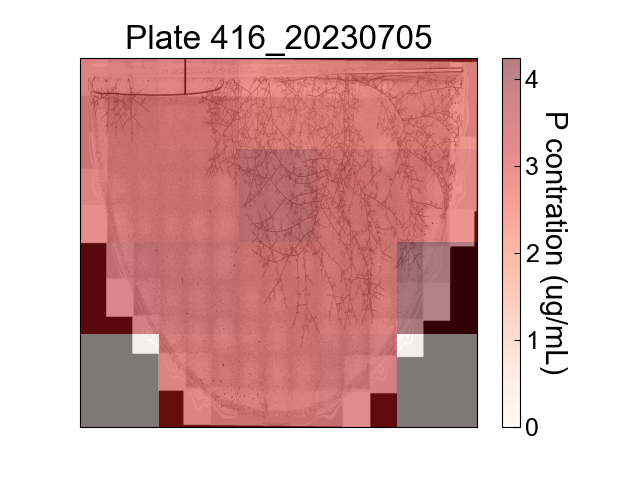

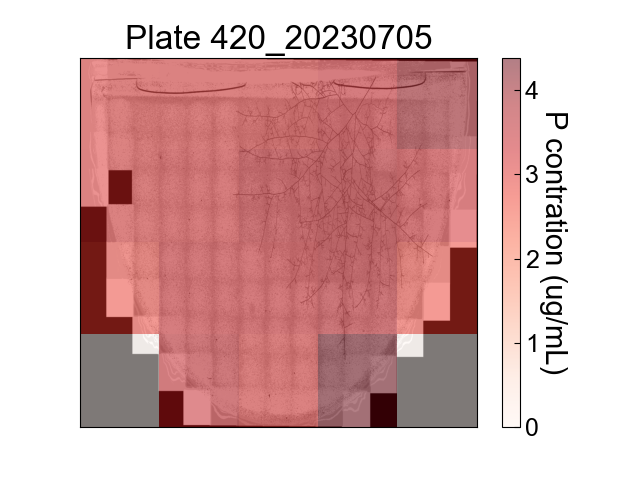

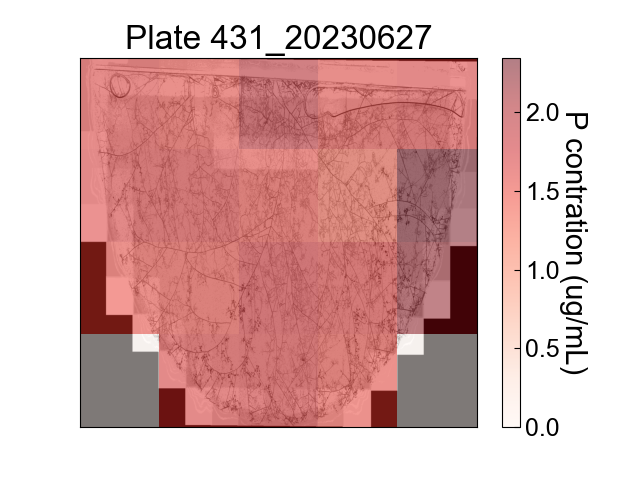

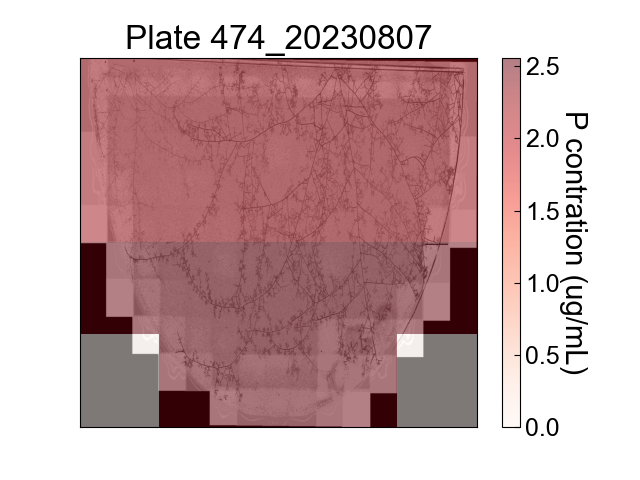

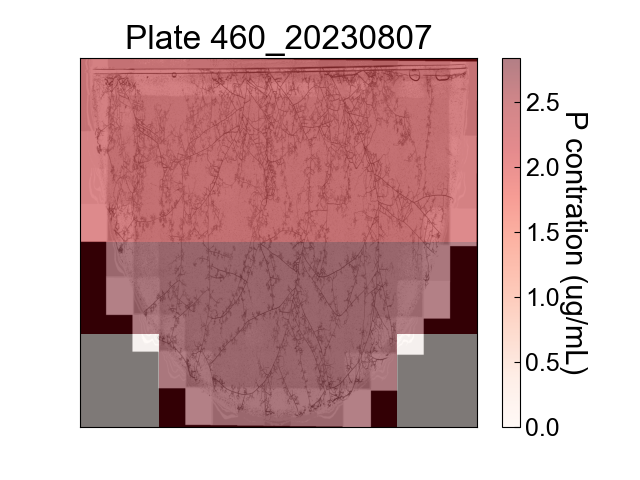

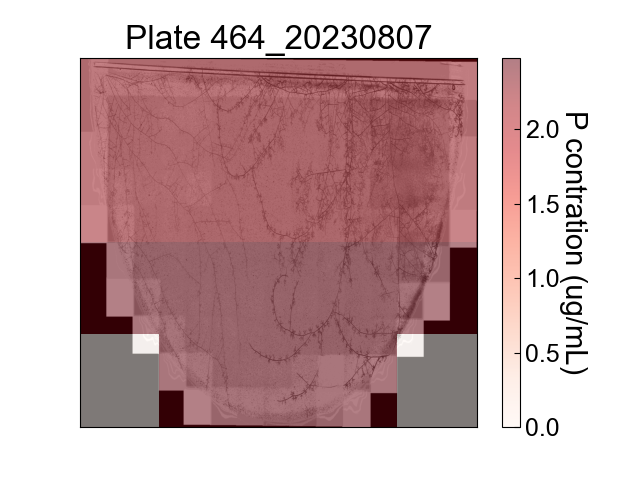

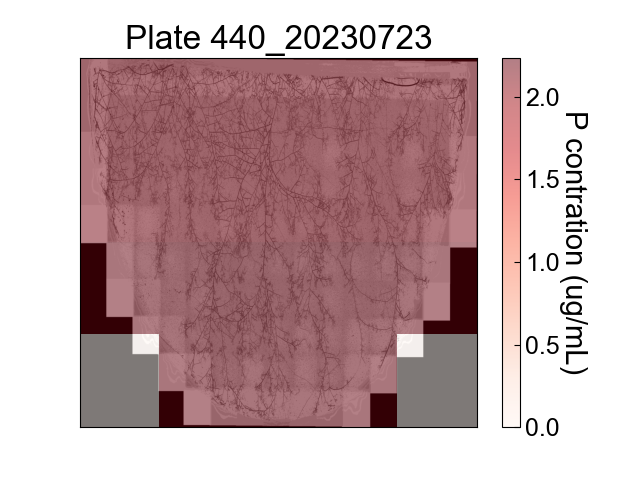

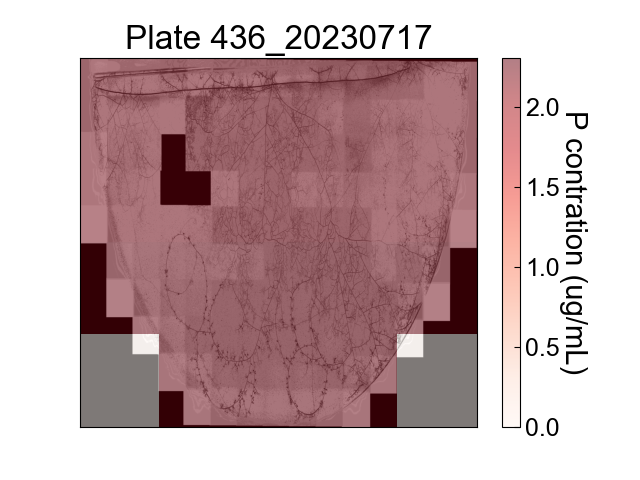

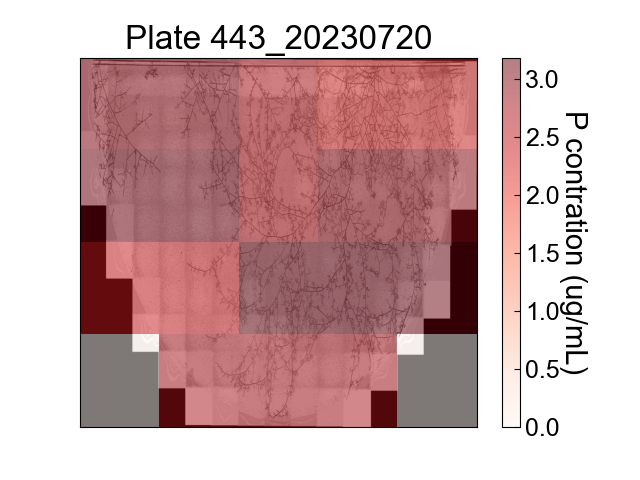

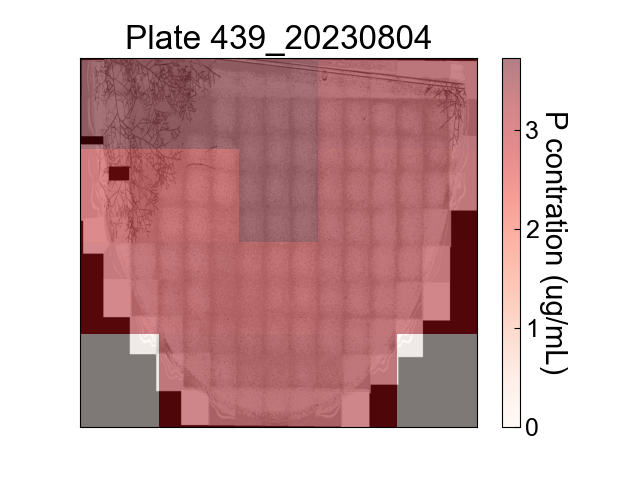

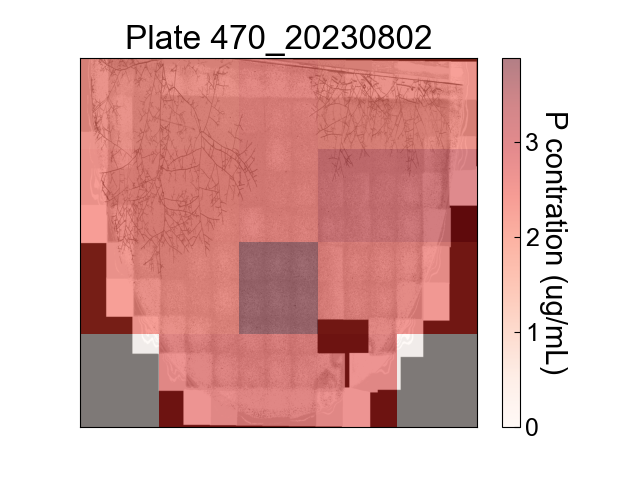

In [185]:
from PIL import Image
df = df[df['type'] != 'root']
df = df[df['type'] != 'rootagar']
df['pos'] = df['Sample_name'].str.split('-').str.get(1).astype(int)
df['C_P'] = df['totP (ug)']/df['wet weight'] 
basic_mapping = {
    1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4),
    6: (1, 0), 7: (1, 1), 8: (1, 2), 9: (1, 3), 10: (1, 4),
    11: (2, 0), 12: (2, 1), 13: (2, 2), 14: (2, 3), 15: (2, 4),
    16: (3, 1), 17: (3, 2), 18: (3, 3)
}

# Mapping for "coarse" to "basic"
coarse_to_basic_mapping = {
    1: [1, 2],
    2: [3, 8],
    3: [4, 5],
    4: [6, 7],
    5: [9, 10],
    6: [11, 12],
    7: [13],
    8: [14, 15],
    9: [16, 17, 18]
}

# Mapping for "simple" to "basic"
simple_to_basic_mapping = {
    0: list(range(1, 11)),
    1: list(range(11, 19))
}

# Initialize plot
plt.close("all")
for idx, unique_id in enumerate(df['unique_id'].unique()):
    if type(unique_id) ==str:
        fig,ax = plt.subplots()
        plate_df = df[df['unique_id'] == unique_id]

        # Create an empty 4x5 grid (for "basic" arrangement, adjust as needed)
        grid = np.zeros((4, 5))

        for i, row in plate_df.iterrows():
            arrangement = row['arrangement']
            pos = row['pos']
            totP = row['integrated_SA']
            totP = row['C_P']
            

            if arrangement == 'basic':
                x, y = basic_mapping[pos]
                grid[x, y] = totP

            elif arrangement == 'simple':
                for basic_pos in simple_to_basic_mapping[pos]:
                    x, y = basic_mapping[basic_pos]
                    grid[x, y] = totP

            elif arrangement == 'coarse':
                for basic_pos in coarse_to_basic_mapping[pos]:
                    x, y = basic_mapping[basic_pos]
                    grid[x, y] = totP

        # Plotting the grid
        image_path = os.path.join("C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\DATA\\PRINCE_ANALYSIS", unique_id)

        # Find the image in the folder with name like 'StitchedImage_YYYYMMDD_hhmm.tif'
        for image_file in os.listdir(image_path):
            if 'StitchedImage' in image_file:
                img = Image.open(os.path.join(image_path, image_file))

        # Display the image
        ax.imshow(np.array(img), cmap='gray', extent=[-0.5, 4.5, -0.5, 3.5])
        c = ax.imshow(grid, cmap='Reds', aspect='auto',alpha = 0.5)
        cbar = fig.colorbar(c, ax=ax)
        cbar.set_label('P contration (ug/mL)', rotation=270, labelpad=20)
        ax.set_title(f'Plate {unique_id}')
        ax.set_xticks([])
        ax.set_yticks([])
        
    # break
# plt.show()